In [1]:
import pandas as pd
import re
import numpy as np
import nltk 
import math
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
ds = pd.read_csv("db.csv", header=None)
ds.columns = ["Title", "Company", "Location", "Type", "Link"]

ds.head()

,Title,Company,Location,Type,Link
0,Teaching Faculty,SONAM TUITIONS,"Kalyan, Maharashtra",Flexible shift,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Norwegian content writer required,Great Ponton,"Mumbai, Maharashtra",Day shift,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,MBA (Marketing),Astrotel Pvt Ltd,"Kanpur, Uttar Pradesh",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Visa counsellor,VISA SPOT,"Mohali, Punjab",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,Scrum Master 4,Comcast,"Chennai, Tamil Nadu",Weekend availability,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


In [3]:
sample = pd.read_csv("naukri.csv")

sample.head()

,job_title,role,industry
0,Digital Media Planner,Advertising,"Advertising, PR, MR, Event Management"
1,Online Bidding Executive,Retail Sales,"IT-Software, Software Services"
2,Trainee Research/ Research Executive- Hi- Tec...,R&D,"Recruitment, Staffing"
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT-Software, Software Services"
4,Software Test Engineer -hyderabad,Programming & Design,"IT-Software, Software Services"


In [4]:
sample = sample.dropna()
sample.industry = sample.industry.apply(lambda x: re.split(',| ', x)[0])
sample.head()

,job_title,role,industry
0,Digital Media Planner,Advertising,Advertising
1,Online Bidding Executive,Retail Sales,IT-Software
2,Trainee Research/ Research Executive- Hi- Tec...,R&D,Recruitment
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,IT-Software
4,Software Test Engineer -hyderabad,Programming & Design,IT-Software


In [5]:
industry_counts = sample['industry'].value_counts()

popular_industries = industry_counts[industry_counts>5]

popular_industries_list = popular_industries.index.tolist()

sample = sample[sample['industry'].isin(popular_industries_list)]

sample.head()

,job_title,role,industry
0,Digital Media Planner,Advertising,Advertising
1,Online Bidding Executive,Retail Sales,IT-Software
2,Trainee Research/ Research Executive- Hi- Tec...,R&D,Recruitment
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,IT-Software
4,Software Test Engineer -hyderabad,Programming & Design,IT-Software


In [6]:
sample['industry'] = sample['industry'].apply(lambda x: x.replace('-', ' '))
sample.head()

,job_title,role,industry
0,Digital Media Planner,Advertising,Advertising
1,Online Bidding Executive,Retail Sales,IT Software
2,Trainee Research/ Research Executive- Hi- Tec...,R&D,Recruitment
3,Technical Support,Admin/Maintenance/Security/Datawarehousing,IT Software
4,Software Test Engineer -hyderabad,Programming & Design,IT Software


In [7]:
import sklearn.metrics as mt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
X = sample["job_title"]
Y = sample["industry"]

from sklearn.model_selection import train_test_split as tt
X_train, X_test, Y_train, Y_test = tt(X, Y, test_size=0.2, random_state=100)

In [9]:
vec = CountVectorizer(stop_words='english')
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [10]:
X_train_transformed = vec.transform(X_train)
X_test_transformed = vec.transform(X_test)

In [11]:
model = MultinomialNB()
model.fit(X_train_transformed, Y_train)

MultinomialNB()

In [12]:
y_pred = model.predict(X_test_transformed)
y_pred_prob = model.predict_proba(X_test_transformed)

In [13]:
print(mt.classification_report(Y_test, y_pred, zero_division=1))

                precision    recall  f1-score   support

    Accounting       0.40      0.05      0.09        80
   Advertising       0.50      0.05      0.09        97
   Agriculture       1.00      0.00      0.00        10
     Animation       1.00      0.00      0.00         2
  Architecture       1.00      0.00      0.00        25
    Automobile       0.53      0.09      0.16        96
      Aviation       1.00      0.00      0.00         5
           BPO       0.56      0.60      0.58       377
       Banking       0.42      0.48      0.45       330
      Ceramics       1.00      0.00      0.00         5
     Chemicals       0.50      0.04      0.08        23
  Construction       0.45      0.08      0.13       117
      Consumer       1.00      0.00      0.00        30
       Courier       1.00      0.00      0.00        33
     Education       0.67      0.40      0.50       226
   Electricals       1.00      0.00      0.00        22
        Export       1.00      0.00      0.00  

In [14]:
X_test_transformed = vec.transform(ds.Title)

In [15]:
ds

,Title,Company,Location,Type,Link
0,Teaching Faculty,SONAM TUITIONS,"Kalyan, Maharashtra",Flexible shift,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Norwegian content writer required,Great Ponton,"Mumbai, Maharashtra",Day shift,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,MBA (Marketing),Astrotel Pvt Ltd,"Kanpur, Uttar Pradesh",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Visa counsellor,VISA SPOT,"Mohali, Punjab",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,Scrum Master 4,Comcast,"Chennai, Tamil Nadu",Weekend availability,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
...,...,...,...,...,...
3952,EY - Director - Cyber Security - Government Ad...,EY India,Delhi,Regular,https://www.shine.com/jobs/ey-director-cyber-s...
3953,SafexPay - Head - Technology,Paygate India Private Limited,Mumbai City,Regular,https://www.shine.com/jobs/safexpay-head-techn...
3954,Process Developer - Accounts Payable,Genpact India Pvt. Ltd.,Kolkata,Regular,https://www.shine.com/jobs/process-developer-a...
3955,Continuum Green Energy - Company Secretary,Continuum Green Energy (India) Pvt ...,Mumbai City,Regular,https://www.shine.com/jobs/continuum-green-ene...


In [16]:
roles = model.predict(X_test_transformed)

ds["role"] = roles 

ds

,Title,Company,Location,Type,Link,role
0,Teaching Faculty,SONAM TUITIONS,"Kalyan, Maharashtra",Flexible shift,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Education
1,Norwegian content writer required,Great Ponton,"Mumbai, Maharashtra",Day shift,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,IT Software
2,MBA (Marketing),Astrotel Pvt Ltd,"Kanpur, Uttar Pradesh",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,IT Software
3,Visa counsellor,VISA SPOT,"Mohali, Punjab",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Education
4,Scrum Master 4,Comcast,"Chennai, Tamil Nadu",Weekend availability,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,IT Software
...,...,...,...,...,...,...
3952,EY - Director - Cyber Security - Government Ad...,EY India,Delhi,Regular,https://www.shine.com/jobs/ey-director-cyber-s...,Banking
3953,SafexPay - Head - Technology,Paygate India Private Limited,Mumbai City,Regular,https://www.shine.com/jobs/safexpay-head-techn...,IT Software
3954,Process Developer - Accounts Payable,Genpact India Pvt. Ltd.,Kolkata,Regular,https://www.shine.com/jobs/process-developer-a...,IT Software
3955,Continuum Green Energy - Company Secretary,Continuum Green Energy (India) Pvt ...,Mumbai City,Regular,https://www.shine.com/jobs/continuum-green-ene...,Recruitment


In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

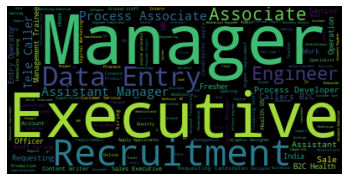

In [18]:
titlecontents = " ".join(ds['Title'].tolist())

wordcloud = WordCloud().generate(titlecontents) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
ds['combined'] = ds['Title'] + ' ' + ds['role'] + ' ' + ds['Location']

In [21]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(ds['combined'].tolist())

In [22]:
docsimilarity = cosine_similarity(tfIdf)

print(docsimilarity)

[[1.         0.06035032 0.         ... 0.         0.         0.        ]
 [0.06035032 1.         0.03095397 ... 0.03788516 0.04313678 0.02529338]
 [0.         0.03095397 1.         ... 0.03911355 0.         0.02611349]
 ...
 [0.         0.03788516 0.03911355 ... 1.         0.         0.03196081]
 [0.         0.04313678 0.         ... 0.         1.         0.        ]
 [0.         0.02529338 0.02611349 ... 0.03196081 0.         1.        ]]


In [95]:
#sample user

inputs = {
    'Title': ['Software Tester', 'Software Development'],
    'Location': 'Chennai'
}

usertitle = " ".join(inputs['Title'])

urole = []
for i in inputs['Title']:
    utitle = vec.transform([i])
    urole.append("".join(model.predict(utitle).tolist()))

urole = list(set(urole))

userrole = " ".join(urole)

user = usertitle + ' ' + inputs['Location'] + ' ' + userrole

In [96]:
input_vector = tfIdfVectorizer.transform([user])
cosine_similarities = cosine_similarity(input_vector, tfIdf).flatten()

In [97]:
def jaccard(a, b):
    intersection = a.intersection(b)
    union = a.union(b)

    return len(intersection)/len(union)

In [98]:
jaccard_sim = []
for doc in ds['combined'].tolist():
    jaccard_sim.append(jaccard(set(doc.lower().split()), set(user.lower().split())))

similarities = cosine_similarities + jaccard_sim

In [99]:
most_similar_indices = similarities.argsort()[::-1]

Most Similar Job Postings to the user's posting

In [100]:
idx = 0
average_before_hybrid = 0
for index in most_similar_indices:
    idx+=1
    print("Title: '{}' '{}' '{}' \t Score: {}".format(ds.loc[index, 'Title'], ds.loc[index, 'Company'], ds.loc[index, 'Location'], cosine_similarities[index]))
    average_before_hybrid += cosine_similarities[index]
    if idx > 5:
        break

Title: 'Engineer II - Software Development' 'Verizon Data Services India Pvt.Ltd' 'Chennai' 	 Score: 0.5732405600273047
Title: 'Engineering III Consultant-Software Development' 'Verizon Data Services India Pvt.Ltd' 'Chennai' 	 Score: 0.4803875536636783
Title: 'Software Tester' 'Eazy ERP Technologies Pvt Ltd' 'Gurgaon, Haryana, India' 	 Score: 0.5888181792272092
Title: 'QA Tester' 'getactyv' 'Bengaluru, Karnataka' 	 Score: 0.4730883578180185
Title: 'Business Development Manager' 'A-CLASS MARBLE INDIA PRIVATE LIMITE...' 'Delhi' 	 Score: 0.4658453762657441
Title: 'Business Development' 'AIGM ALL INDIA GIFTS MANAGER' 'Mumbai City' 	 Score: 0.45681249937113894


In [101]:
average_before_hybrid /= 6
average_before_hybrid

0.5063654210621823

In [102]:
users = pd.read_csv("users.csv")

users.head()

,UID,Title,Location
0,1,Data Scientist,Chennai
1,2,Web Development,Delhi
2,3,Software Engineer,NaN
3,4,Javascript Developer,Chennai
4,5,Data Analyst,Chennai


In [103]:
users = users.replace(np.nan, "")
users.head()

,UID,Title,Location
0,1,Data Scientist,Chennai
1,2,Web Development,Delhi
2,3,Software Engineer,
3,4,Javascript Developer,Chennai
4,5,Data Analyst,Chennai


In [104]:
users['combined'] = users['Title'] + ' ' + users['Location']
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf_user = tfIdfVectorizer.fit_transform(users['combined'].tolist())

In [105]:
usersimilarity = cosine_similarity(tfIdf_user)

print(usersimilarity)

[[1.         0.         0.         0.20164876 0.51481477 0.
  0.         0.         0.         0.20164876 0.         0.
  0.         0.         0.         0.27642067 0.24331544 0.18626369
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.22477404 0.         0.24226158 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.25520171 0.42918784 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.37614352 0.         0.
  0.         0.         0.         0.         0.         0.
  0.85020722 0.         0.         0.         0.         0.        ]
 [0.20164876 0.         0.         1.         0.20164876 0.
  0.         0.         0.30358432 0.20164876 0.         0.
  0.         0.         0.         0.         0.24331544 0.18626369
  0.         0.37614352 0.         0.         0.         

In [106]:
input_vector = tfIdfVectorizer.transform([user])
cosine_similarities = cosine_similarity(input_vector, tfIdf_user).flatten()

In [107]:
jaccard_sim = []
for u in users['combined'].tolist():
    jaccard_sim.append(jaccard(set(u.lower().split()), set(user.lower().split())))

similarities = cosine_similarities + jaccard_sim

In [108]:
most_similar_user_indices = similarities.argsort()[::-1]

Most Similar users

In [109]:
user_similarity_features = []

for index in most_similar_user_indices:
    if cosine_similarities[index] < 0.5:
        break
    print("Title: '{}' '{}' \t Score: {}".format(users.loc[index, 'Title'], users.loc[index, 'Location'], cosine_similarities[index]))
    user_similarity_features.append("{}".format(users.loc[index, 'Title']))

Title: 'Software Engineer' '' 	 Score: 0.6389803004792791
Title: 'Software Engineer' 'Delhi' 	 Score: 0.5432656643159911


In [110]:
user_similarity_features

['Software Engineer', 'Software Engineer']

In [111]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(ds['combined'].tolist())

In [112]:
user = user + ' ' + ' '.join(user_similarity_features)

user

'Software Tester Software Development Chennai IT Software Software Engineer Software Engineer'

In [113]:
input_vector = tfIdfVectorizer.transform([user])
cosine_similarities = cosine_similarity(input_vector, tfIdf).flatten()

In [114]:
jaccard_sim = []
for doc in ds['combined'].tolist():
    jaccard_sim.append(jaccard(set(doc.lower().split()), set(user.lower().split())))

similarities = cosine_similarities + jaccard_sim

In [115]:
most_similar_indices = similarities.argsort()[::-1]

In [116]:
idx = 0
average_after_hybrid = 0
for index in most_similar_indices:
    idx+=1
    print("Title: '{}' '{}' '{}' \t Score: {}".format(ds.loc[index, 'Title'], ds.loc[index, 'Company'], ds.loc[index, 'Location'], cosine_similarities[index]))
    average_after_hybrid += cosine_similarities[index]
    if idx > 5:
        break

Title: 'Engineer II - Software Development' 'Verizon Data Services India Pvt.Ltd' 'Chennai' 	 Score: 0.6562349466747983
Title: 'Senior Software Engineer' 'OEC INDIA SERVICES PRIVATE LIMITED' 'Chennai' 	 Score: 0.6383781251342958
Title: 'Software engineer' 'Nokia Solutions and Networks India ...' 'Bangalore' 	 Score: 0.6258196036261487
Title: 'Software Engineer' 'UBS Securities India Private Limite...' 'Pune' 	 Score: 0.5937654332148012
Title: 'Software Engineer' 'UBS Securities India Private Limite...' 'Pune' 	 Score: 0.5937654332148012
Title: 'R&D Engineer' 'Nokia Solutions and Networks India ...' 'Bangalore' 	 Score: 0.5334357035545455


In [117]:
average_after_hybrid /= 6
average_after_hybrid

0.6068998742365651

In [118]:
improvement = (average_after_hybrid/average_before_hybrid) * 100

print("Improvement to average matching score by using proposed hybrid model:", improvement-100, "%")

Improvement to average matching score by using proposed hybrid model: 19.85413082976632 %
